<a href="https://colab.research.google.com/github/simply-sankalp/GHI-forecast/blob/main/normalityTest_bestfitDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded = files.upload()

Saving 15396_26.65_71.65_2000.csv to 15396_26.65_71.65_2000.csv
Saving 15396_26.65_71.65_2001.csv to 15396_26.65_71.65_2001.csv
Saving 15396_26.65_71.65_2002.csv to 15396_26.65_71.65_2002.csv
Saving 15396_26.65_71.65_2003.csv to 15396_26.65_71.65_2003.csv
Saving 15396_26.65_71.65_2004.csv to 15396_26.65_71.65_2004.csv
Saving 15396_26.65_71.65_2005.csv to 15396_26.65_71.65_2005.csv
Saving 15396_26.65_71.65_2006.csv to 15396_26.65_71.65_2006.csv
Saving 15396_26.65_71.65_2007.csv to 15396_26.65_71.65_2007.csv
Saving 15396_26.65_71.65_2008.csv to 15396_26.65_71.65_2008.csv
Saving 15396_26.65_71.65_2009.csv to 15396_26.65_71.65_2009.csv
Saving 15396_26.65_71.65_2010.csv to 15396_26.65_71.65_2010.csv
Saving 15396_26.65_71.65_2011.csv to 15396_26.65_71.65_2011.csv
Saving 15396_26.65_71.65_2012.csv to 15396_26.65_71.65_2012.csv
Saving 15396_26.65_71.65_2013.csv to 15396_26.65_71.65_2013.csv
Saving 15396_26.65_71.65_2014.csv to 15396_26.65_71.65_2014.csv


/tmp/ipython-input-2384399292.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ghi = ghi.fillna(method='ffill').fillna(method='bfill')


Total cleaned GHI values: 64884


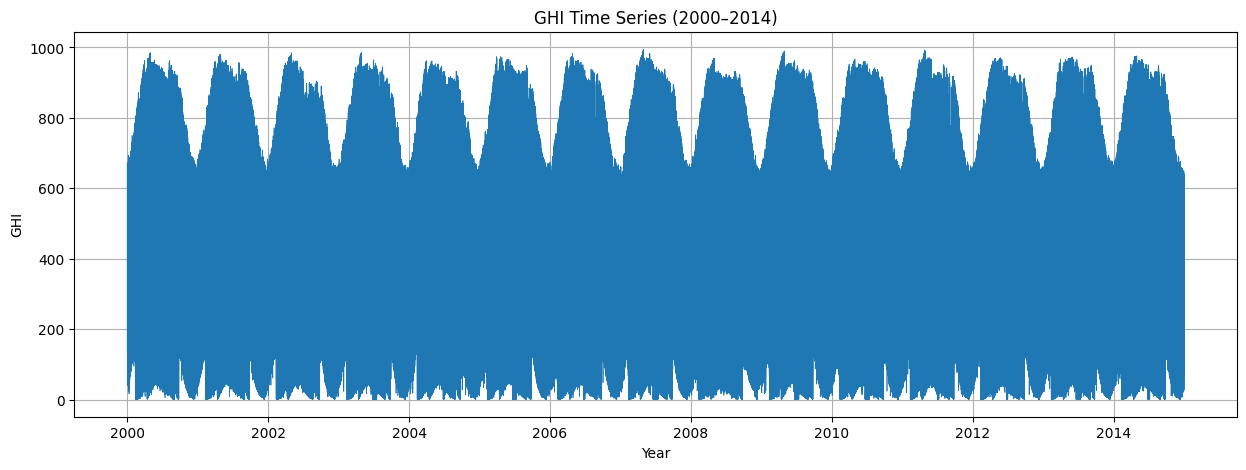


===== ANDERSON–DARLING NORMALITY TEST =====
Statistic: 937.9554

Critical Values:
Significance Level: 15.0% | Critical Value: 0.576
Significance Level: 10.0% | Critical Value: 0.656
Significance Level: 5.0% | Critical Value: 0.787
Significance Level: 2.5% | Critical Value: 0.918
Significance Level: 1.0% | Critical Value: 1.092

Conclusion at 5% level:
As test Statistic (937.9554) > critcal value (0.787)
Reject H0 → Data is NOT Normally Distributed

===== Z-PROPORTION NORMALITY TEST =====
P(|X-μ| < 1σ): observed=0.5753, Z=-58.802
P(|X-μ| < 2σ): observed=1.0000, Z=55.614
P(|X-μ| < 3σ): observed=1.0000, Z=13.254
As z-value > 1.96
RESULT: Reject H0 → Data is NOT Normally Distributed

===== DISTRIBUTION FIT (AIC SCORES) =====
Lognormal AIC: 962579.17
Gamma AIC:     928461.30
Weibull AIC:   923295.30
BEST FIT: WEIBULL Distribution

===== FINAL CONCLUSION =====
Anderson–Darling Test: NOT Normal
Z-proportion test: NOT Normal

Conclusion: GHI DOES NOT FOLLOW NORMAL DISTRIBUTION.
Best-fitting d

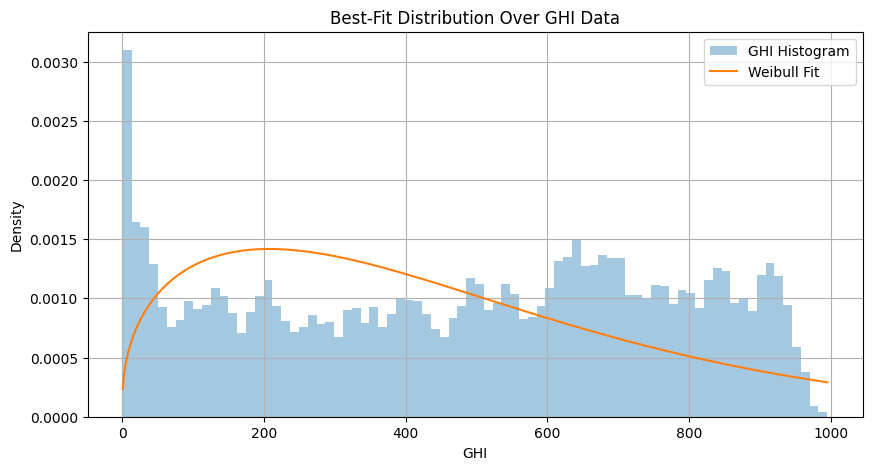


===== YEAR-WISE NORMALITY TESTS =====

YEAR | AD Normal? | Z Normal?
2000 | False | False
2001 | False | False
2002 | False | False
2003 | False | False
2004 | False | False
2005 | False | False
2006 | False | False
2007 | False | False
2008 | False | False
2009 | False | False
2010 | False | False
2011 | False | False
2012 | False | False
2013 | False | False
2014 | False | False

===== YEARWISE SUMMARY =====
Years normal by AD test: 0 out of 15
Years normal by Z-proportion test: 0 out of 15
Conclusion: None of the yearly GHI distributions are normal.

Generating 15-year subplot figure...


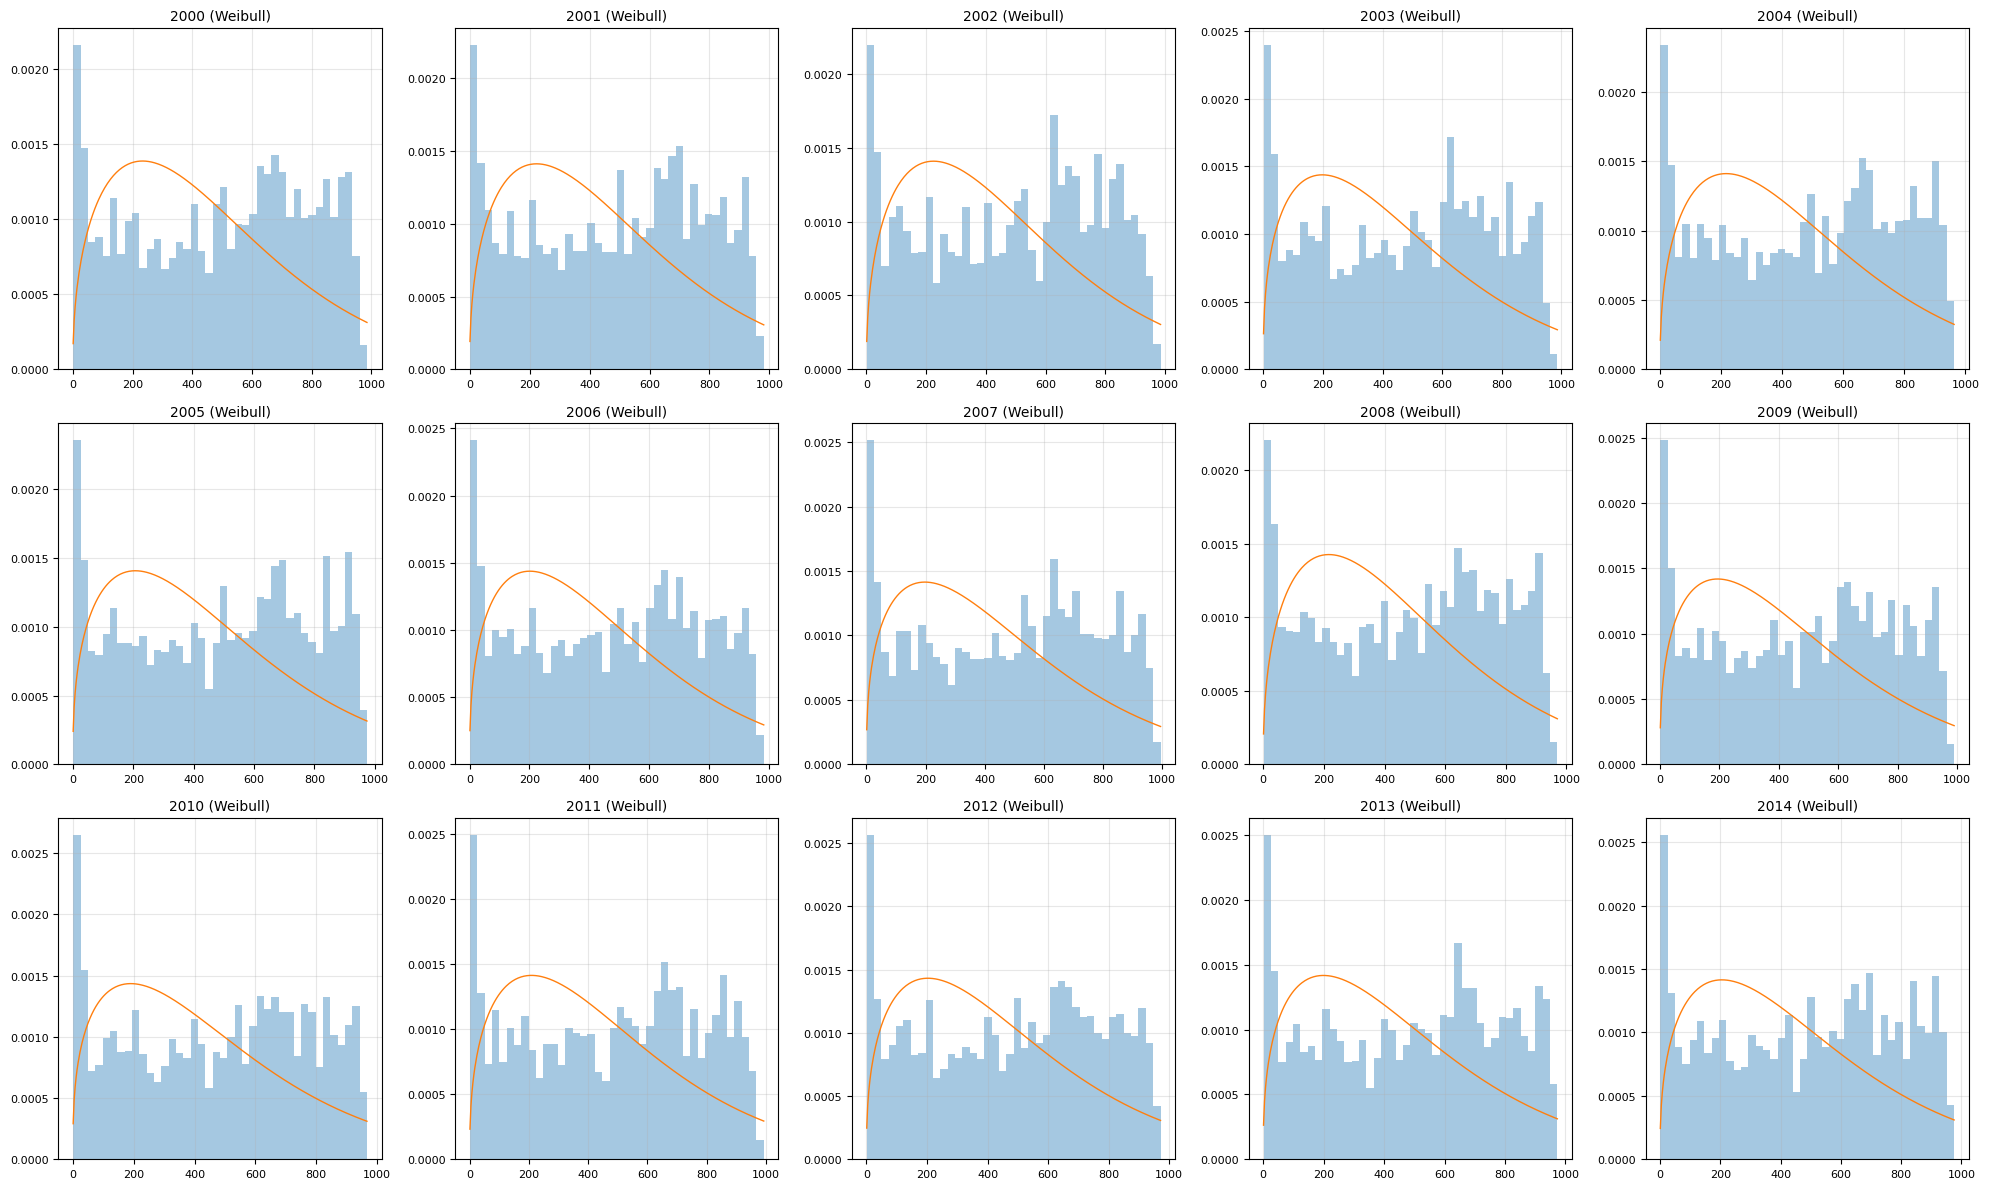

In [18]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import anderson, lognorm, gamma, weibull_min
from math import sqrt

# ---------------------------------------------------------
# 1. LOAD & MERGE ALL CSV FILES
# ---------------------------------------------------------
file_list = sorted(uploaded.keys())
dfs = []
for f in uploaded.keys():
    df = pd.read_csv(f, skiprows=2)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)

# ---------------------------------------------------------
# 2. CREATE DATETIME INDEX
# ---------------------------------------------------------
data['Datetime'] = pd.to_datetime(
    data[['Year', 'Month', 'Day', 'Hour', 'Minute']],
    errors='coerce'
)
data = data.dropna(subset=['Datetime'])
data = data.set_index('Datetime')

# ---------------------------------------------------------
# 3. CLEAN GHI COLUMN
# ---------------------------------------------------------
ghi = pd.to_numeric(data['GHI'], errors='coerce')
ghi = ghi.fillna(method='ffill').fillna(method='bfill')

# Optional: remove night-time zeroes (improves distribution tests)
ghi = ghi[ghi > 0]

print("Total cleaned GHI values:", len(ghi))

plt.figure(figsize=(15,5))
plt.plot(ghi.index, ghi.values, linewidth=0.5)
plt.title("GHI Time Series (2000–2014)")
plt.xlabel("Year")
plt.ylabel("GHI")
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 4. PRIMARY NORMALITY TEST:
# ---------------------------------------------------------
print("\n===== ANDERSON–DARLING NORMALITY TEST =====")

ad_result = anderson(ghi, dist='norm')

print(f"Statistic: {ad_result.statistic:.4f}")
print("\nCritical Values:")
for sl, cv in zip(ad_result.significance_level, ad_result.critical_values):
    print(f"Significance Level: {sl:>3}% | Critical Value: {cv}")

# Use 5% significance level → index = 2
cv_5 = ad_result.critical_values[2]

print("\nConclusion at 5% level:")
if ad_result.statistic > cv_5:
    print(f"As test Statistic ({ad_result.statistic:.4f}) > critcal value ({cv_5})")
    print("Reject H0 → Data is NOT Normally Distributed")
else:
    print(f"As test Statistic ({ad_result.statistic}) < critcal value ({cv_5})")
    print("Fail to Reject H0 → Data MAY be Normal")

# ---------------------------------------------------------
# 5. Z-PROPORTION TEST (±1σ, ±2σ, ±3σ)
# ---------------------------------------------------------
mu = ghi.mean()
sigma = ghi.std()
n = len(ghi)

p1 = ((ghi > mu - sigma) & (ghi < mu + sigma)).mean()
p2 = ((ghi > mu - 2*sigma) & (ghi < mu + 2*sigma)).mean()
p3 = ((ghi > mu - 3*sigma) & (ghi < mu + 3*sigma)).mean()

def ztest(phat, p0, n):
    return (phat - p0) / sqrt(p0*(1-p0)/n)

z1 = ztest(p1, 0.6827, n)
z2 = ztest(p2, 0.9545, n)
z3 = ztest(p3, 0.9973, n)

print("\n===== Z-PROPORTION NORMALITY TEST =====")
print(f"P(|X-μ| < 1σ): observed={p1:.4f}, Z={z1:.3f}")
print(f"P(|X-μ| < 2σ): observed={p2:.4f}, Z={z2:.3f}")
print(f"P(|X-μ| < 3σ): observed={p3:.4f}, Z={z3:.3f}")

# Interpretation
if abs(z1) > 1.96 or abs(z2) > 1.96 or abs(z3) > 1.96:
    print("As z-value > 1.96")
    print("RESULT: Reject H0 → Data is NOT Normally Distributed")
else:
    print("RESULT: Fail to Reject H0 → Data MAY be Normal")

# ---------------------------------------------------------
# 6. BEST-FIT DISTRIBUTION: LOGNORMAL, GAMMA, WEIBULL
# ---------------------------------------------------------
# Lognormal
shape_ln, loc_ln, scale_ln = lognorm.fit(ghi, floc=0)
aic_ln = 2*2 - 2*np.sum(lognorm.logpdf(ghi, shape_ln, loc=loc_ln, scale=scale_ln))

# Gamma
shape_gm, loc_gm, scale_gm = gamma.fit(ghi, floc=0)
aic_gm = 2*2 - 2*np.sum(gamma.logpdf(ghi, shape_gm, loc=loc_gm, scale=scale_gm))

# Weibull
shape_wb, loc_wb, scale_wb = weibull_min.fit(ghi, floc=0)
aic_wb = 2*2 - 2*np.sum(weibull_min.logpdf(ghi, shape_wb, loc=loc_wb, scale=scale_wb))

best = min(aic_ln, aic_gm, aic_wb)

print("\n===== DISTRIBUTION FIT (AIC SCORES) =====")
print(f"Lognormal AIC: {aic_ln:.2f}")
print(f"Gamma AIC:     {aic_gm:.2f}")
print(f"Weibull AIC:   {aic_wb:.2f}")

best = min(aic_ln, aic_gm, aic_wb)
if best == aic_ln:
    print("BEST FIT: LOGNORMAL Distribution")
elif best == aic_gm:
    print("BEST FIT: GAMMA Distribution")
else:
    print("BEST FIT: WEIBULL Distribution")

# ---------------------------------------------------------
# 7. FINAL SUMMARY
# ---------------------------------------------------------
print("\n===== FINAL CONCLUSION =====")
ad_5_crit = ad_result.critical_values[2]
print("Anderson–Darling Test:", "NOT Normal" if ad_result.statistic > ad_5_crit else "Possibly Normal")
print("Z-proportion test:", "NOT Normal" if abs(z1)>1.96 or abs(z2)>1.96 or abs(z3)>1.96 else "Possibly Normal")

print("\nConclusion: GHI DOES NOT FOLLOW NORMAL DISTRIBUTION.")
print("Best-fitting distribution:",
      "Lognormal" if best==aic_ln else ("Gamma" if best==aic_gm else "Weibull"))

x = np.linspace(ghi.min(), ghi.max(), 500)

plt.figure(figsize=(10,5))
plt.hist(ghi, bins=80, density=True, alpha=0.4, label="GHI Histogram")

if best == aic_ln:
    plt.plot(x, lognorm.pdf(x, shape_ln, loc_ln, scale_ln), label="Lognormal Fit")
elif best == aic_gm:
    plt.plot(x, gamma.pdf(x, shape_gm, loc_gm, scale_gm), label="Gamma Fit")
else:
    plt.plot(x, weibull_min.pdf(x, shape_wb, loc_wb, scale_wb), label="Weibull Fit")

plt.title("Best-Fit Distribution Over GHI Data")
plt.xlabel("GHI")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# 8. YEARWISE NORMALITY ANALYSIS
# ---------------------------------------------------------
print("\n===== YEAR-WISE NORMALITY TESTS =====")

year_results = []

years = sorted(ghi.index.year.unique())

for yr in years:
    ghi_year = ghi[ghi.index.year == yr]

    # Anderson
    ad_res = anderson(ghi_year, dist='norm')
    cv_5 = ad_res.critical_values[2]
    ad_normal = ad_res.statistic < cv_5

    # Z proportion
    mu_y = ghi_year.mean()
    sigma_y = ghi_year.std()
    n_y = len(ghi_year)

    p1_y = ((ghi_year > mu_y - sigma_y) & (ghi_year < mu_y + sigma_y)).mean()
    p2_y = ((ghi_year > mu_y - 2*sigma_y) & (ghi_year < mu_y + 2*sigma_y)).mean()
    p3_y = ((ghi_year > mu_y - 3*sigma_y) & (ghi_year < mu_y + 3*sigma_y)).mean()

    z1_y = ztest(p1_y, 0.6827, n_y)
    z2_y = ztest(p2_y, 0.9545, n_y)
    z3_y = ztest(p3_y, 0.9973, n_y)

    z_normal = (abs(z1_y) < 1.96 and abs(z2_y) < 1.96 and abs(z3_y) < 1.96)

    year_results.append([yr, ad_normal, z_normal])

print("\nYEAR | AD Normal? | Z Normal?")
for yr, ad_n, z_n in year_results:
    print(f"{yr} | {ad_n} | {z_n}")

# Final combined decision
n_ad = sum(1 for _, a, _ in year_results if a)
n_z = sum(1 for _, _, z in year_results if z)

print("\n===== YEARWISE SUMMARY =====")
print(f"Years normal by AD test: {n_ad} out of {len(years)}")
print(f"Years normal by Z-proportion test: {n_z} out of {len(years)}")

if n_ad == 0 and n_z == 0:
    print("Conclusion: None of the yearly GHI distributions are normal.")
elif n_ad < len(years)/3:
    print("Conclusion: Only a few years appear normal → GHI is not reliably normal yearly.")
else:
    print("Conclusion: Multiple years separately behave normal → but combined dataset is not normal.")

# ---------------------------------------------------------
# 9. MULTI-PLOT: 15 YEARS (HIST + BEST FIT DISTRIBUTION)
# ---------------------------------------------------------
print("\nGenerating 15-year subplot figure...")

years = sorted(ghi.index.year.unique())
num_years = len(years)

# Layout: 3 rows × 5 columns
cols = 5
rows = int(np.ceil(num_years / cols))

plt.figure(figsize=(20, 12))

plot_index = 1

for yr in years:
    ghi_year = ghi[ghi.index.year == yr]

    # Fit 3 distributions
    ln_params = lognorm.fit(ghi_year, floc=0)
    gm_params = gamma.fit(ghi_year, floc=0)
    wb_params = weibull_min.fit(ghi_year, floc=0)

    # Compute AIC
    def aic(dist, params, x):
        ll = np.sum(dist.logpdf(x, *params))
        k = len(params)
        return 2*k - 2*ll

    aic_ln = aic(lognorm, ln_params, ghi_year)
    aic_gm = aic(gamma, gm_params, ghi_year)
    aic_wb = aic(weibull_min, wb_params, ghi_year)

    # Pick best distribution
    best_aic = min(aic_ln, aic_gm, aic_wb)
    xvals = np.linspace(ghi_year.min(), ghi_year.max(), 300)

    plt.subplot(rows, cols, plot_index)
    plt.hist(ghi_year, bins=40, density=True, alpha=0.4)

    if best_aic == aic_ln:
        plt.plot(xvals, lognorm.pdf(xvals, *ln_params), label="Lognormal", linewidth=1)
        title_dist = "Lognormal"
    elif best_aic == aic_gm:
        plt.plot(xvals, gamma.pdf(xvals, *gm_params), label="Gamma", linewidth=1)
        title_dist = "Gamma"
    else:
        plt.plot(xvals, weibull_min.pdf(xvals, *wb_params), label="Weibull", linewidth=1)
        title_dist = "Weibull"

    plt.title(f"{yr} ({title_dist})", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True, alpha=0.3)
    plot_index += 1

plt.tight_layout()
plt.show()